In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from google.colab import drive 
import zipfile

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/archive (2).zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
df = pd.read_csv('/content/trainingdatasets/Train50.csv', sep=";", header=0, index_col=None )

In [ ]:
df.shape

(50000, 5)

In [ ]:
df.head(2)

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)


In [ ]:
df.tail(2)

,id,tweet_text,tweet_date,sentiment,query_used
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


In [ ]:
df['sentiment'].unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


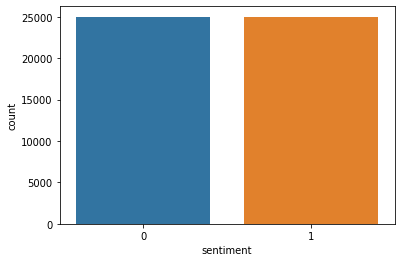

In [ ]:
sns.countplot(df['sentiment'])

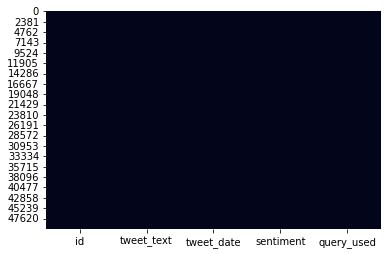

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.columns

Index(['id', 'tweet_text', 'tweet_date', 'sentiment', 'query_used'], dtype='object')

In [ ]:
df.drop(['id', 'tweet_date', 'query_used'], axis=1, inplace=True)

In [ ]:
df.head(2)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1


BASE TESTE

In [ ]:
df_teste = pd.read_csv('/content/testdatasets/Test.csv', sep=';', header=0, index_col=None)

In [ ]:
df_teste.head(2)

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)


In [ ]:
df_teste = df_teste[['tweet_text', 'sentiment']]

In [ ]:
df_teste

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1
...,...,...
4995,@ol_cdanilo parece livro de autoajuda :(,0
4996,@tatazoquita aaaaa sinto muito :((,0
4997,To começando a sentir dor de novo e meu irmão ...,0
4998,@ichbintw parece que no dia que toma a vacina ...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


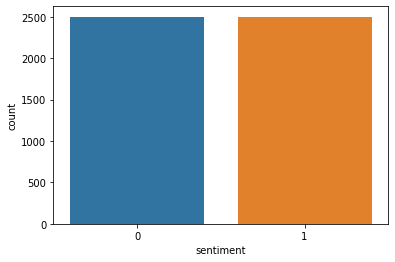

In [ ]:
sns.countplot(df_teste['sentiment'])

# PRE TRAITEMENT DE TEXTES

Letras minúsculas  , Nome do usuário (@), URLs

Espaços em branco, Emoticons , Stop words, Lematização, Pontuações

In [ ]:
texte = df['tweet_text'][1]
texte

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [ ]:
!pip install -q spacy==2.2.3

     |████████████████████████████████| 10.4 MB 25.6 MB/s 
     |████████████████████████████████| 2.2 MB 53.4 MB/s 


In [ ]:
!python3 -m spacy download pt

In [ ]:
import spacy
pln = spacy.load('pt')
pln

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'longe', 'querem', 'você', 'somente', 'onze', 'esse', 'como', 'seu', 'quieta', 'comprida', 'tanta', 'uma', 'lugar', 'quem', 'sempre', 'estar', 'quanto', 'doze', 'outras', 'embora', 'daquela', 'terceira', 'algumas', 'tal', 'ela', 'oito', 'relação', 'estado', 'três', 'porquanto', 'mil', 'outros', 'ali', 'ter', 'apenas', 'irá', 'aos', 'bom', 'tudo', 'conhecido', 'próximo', 'próprio', 'quieto', 'agora', 'poderá', 'tiveram', 'possivelmente', 'tente', 'tive', 'tens', 'coisa', 'estas', 'estiveste', 'vários', 'só', 'ligado', 'breve', 'isso', 'zero', 'porque', 'grande', 'certamente', 'maior', 'pois', 'porém', 'dessa', 'possível', 'cento', 'posição', 'quando', 'fim', 'apoio', 'tentei', 'daquele', 'naquela', 'primeiro', 'estivestes', 'também', 'nenhuma', 'tempo', 'quatro', 'máximo', 'final', 'foram', 'nossas', 'enquanto', 'ambos', 'dá', 'pelas', 'pouca', 'põem', 'vem', 'vindo', 'usa', 'mas', 'ambas', 'quais', 'poder', 'tipo', 'favor', 'uns', 'tivestes', 'todo', 'cinco', 'novos', 'podem', 'tivest

In [ ]:
import string 
ponctuacao = string.punctuation
print(ponctuacao)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
texte = df['tweet_text'][1]
texte

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [ ]:
import re 
def pretraitement(texte):
  texte = texte.lower()
  #Nom d utilizador
  texte = re.sub(r'@[A-Za-z0-9_$.&-+]+',' ', texte)
  #URL
  texte = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texte)
  #Eliminer l espace blanc au debut de la phrase
  texte = re.sub(r' +', ' ', texte)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texte = texte.replace(emocao, lista_emocoes[emocao])
  
  #Lemmatization
  doc = pln(texte)
  lista = []
  for mot in doc:
    lista.append(mot.lemma_)
  
  #Stop_words and ponctuacion
  lista = [mot for mot in lista if mot not in stop_words and mot not in ponctuacao]
  lista = ' '.join([str(mot) for mot in lista if not mot.isdigit()])

  return lista


In [ ]:
essai = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [ ]:
pretraitement(essai)

'  emocaopositiva parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

PRE TRAITEMENT EM BASE DE TEST ET TRAIN

In [ ]:
df.head(2)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1


In [ ]:
df['tweet_text'] = df['tweet_text'].apply(pretraitement)

In [ ]:
df.head(2)

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1


In [ ]:
df_teste['tweet_text'] = df_teste['tweet_text'].apply(pretraitement)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_teste.head(2)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1


# TRATAMENTO DE CLASSE

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [ ]:
df_train_final = []
for texto, emocao in zip(df['tweet_text'], df['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO':False})
  else:
    dic = ({'POSITIVO': False, 'NEGATIVO':True})
  df_train_final.append([texto, dic.copy()])

In [ ]:
df_train_final[0:5]

[['  o pessoa certo parir seriar o valer e azevedo emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['  parir mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['video hoje ... pensar falar sobrar o meter csgo e sobrar o paginar alguem umar sugestao querer falar sobrar cenario nacional emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['aaaaaaaa amar polaroids expressar o quantum to apaixonar vdd ✨ 💖 🎈 🎉 🎊 esperar outro pessoa conseguir ganhar emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['valorizar o coração menino vc diferente o sorrir e d ❤ ️ — valorizar mundo o vidar diferente emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}]]

In [ ]:
len(df_train_final)

50000

In [ ]:
df_teste_final = []
for texto, emocao in zip(df_teste['tweet_text'], df_teste['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO':False})
  else:
    dic = ({'POSITIVO': False, 'NEGATIVO':True})
  df_teste_final.append([texto, dic.copy()])

In [ ]:
df_teste_final[0:5]

[['  obrigar emocaopositiva', {'NEGATIVO': False, 'POSITIVO': True}],
 ['  pa puta parir emocaopositiva', {'NEGATIVO': False, 'POSITIVO': True}],
 ['querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o link ➔ » compartilhar « encontrar o ofertar cupom procurar preocupar ;) criar umar paginar ofertar e cupons atualizada diariamente emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['vcs ajudar galera pelar amor butera emocaopositiva mmvas iheartradiommvas ffsinglenotears',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['casar zé e o morrer sono chegar o casar e ficar sono emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}]]

# CRIACAO DE MODELO

In [ ]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [ ]:
import random
modelo.begin_training()
for epoca in range(10):
  random.shuffle(df_train_final)
  losses = {}
  for batch in spacy.util.minibatch(df_train_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 2.6674047404418033e-05}
{'textcat': 7.149602625211582e-07}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
print(historico_loss)

Text(0, 0.5, 'Erro')

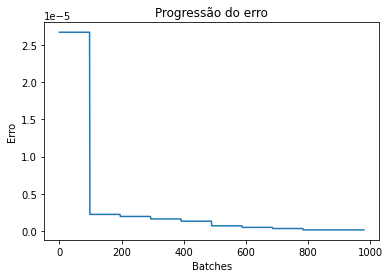

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

# TESTE DU MODELE

A) AVEC UNE PHRASE

In [ ]:
model_charge = spacy.load('modelo')
model_charge

In [ ]:
texte_pos = df['tweet_text'][21]
texte_pos

'  tô calmo emocaopositiva'

In [ ]:
prevision = model_charge(texte_pos)
prevision

  tô calmo emocaopositiva

In [ ]:
prevision.cats

{'NEGATIVO': 0.0008950462215580046, 'POSITIVO': 0.9975243210792542}

In [ ]:
#D un texte fora do dataset
texto_positivo = 'eu gosto muito de você'
texto_positivo = pretraitement(texto_positivo)
texto_positivo

'gostar'

In [ ]:
prevision = model_charge(texto_positivo)
prevision

gostar

In [ ]:
prevision.cats

{'NEGATIVO': 0.07905463129281998, 'POSITIVO': 0.8396252989768982}

# B) EVALUATION DU MODELE

- Evaluation du base de treino 

In [ ]:
#On applique le model_charge sur les tweet_text de la base train pour prevoir ce que seraient leurs sentiments 

In [ ]:
previsoes = []
for texto in df['tweet_text']:
  previsao = model_charge(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes[0:5]

[{'NEGATIVO': 0.000961660931352526, 'POSITIVO': 0.9976256489753723},
 {'NEGATIVO': 0.0010530189611017704, 'POSITIVO': 0.9977826476097107},
 {'NEGATIVO': 0.0014332495629787445, 'POSITIVO': 0.9976547956466675},
 {'NEGATIVO': 0.003764639375731349, 'POSITIVO': 0.9989838004112244},
 {'NEGATIVO': 0.0008761432836763561, 'POSITIVO': 0.997238278388977}]

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
#On a donc ci bas les previsions faites par notre model sur les tweet_text de la base df

In [ ]:
previsoes_final[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
#On compare les sentiments décrits dans la base à ceux de nos previsions faites par notre modele sur les memes tweet-text pour voir si ca correspond

In [ ]:
respostas_reais = df['sentiment'].values
respostas_reais[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
#On construit donc notre matrix de confusion sur les previsions et les respostas_reais(ce qui est attendu) dans la base

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.99978

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[24989,    11],
       [    0, 25000]])

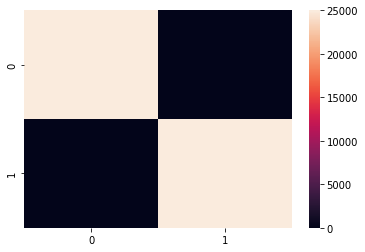

In [ ]:
sns.heatmap(cm)

# - EVALUATION DE LA BASE TEST

In [ ]:
previsoes = []
for texto in df_teste['tweet_text']:
  previsao = model_charge(texto)
  previsoes.append(previsao.cats)
print(previsoes[0:5])

[{'POSITIVO': 0.9988986253738403, 'NEGATIVO': 0.001053861458785832}, {'POSITIVO': 0.9984117746353149, 'NEGATIVO': 0.0009005354368127882}, {'POSITIVO': 0.9992856383323669, 'NEGATIVO': 0.00100292032584548}, {'POSITIVO': 0.9947498440742493, 'NEGATIVO': 0.00344651797786355}, {'POSITIVO': 0.9971346855163574, 'NEGATIVO': 0.0029674721881747246}]


In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)
previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
respostas_reais = df_teste['sentiment'].tolist()
respostas_reais[0:5]

[1, 1, 1, 1, 1]

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.9972

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2495,    5],
       [   9, 2491]])

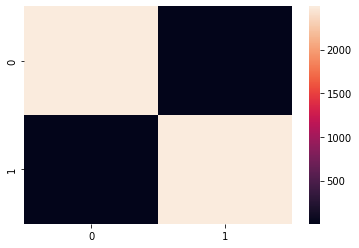

In [ ]:
sns.heatmap(cm)